# Project 3 Web APIs & NLP - Florian Combelles

In week four we've learned about a few different classifiers. In week five we'll learn about webscraping, APIs, and Natural Language Processing (NLP). This project will put those skills to the test.

For project 3, your goal is two-fold:
1. Using [Pushshift's](https://github.com/pushshift/api) API, you'll collect posts from two subreddits of your choosing.
2. You'll then use NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.

###### Requirements

- Gather and prepare your data using the `requests` library.
- **Create and compare two models**. One of these must be a Naive Bayes classifier, however the other can be a classifier of your choosing: logistic regression, KNN, SVM, etc.
- A Jupyter Notebook with your analysis for a peer audience of data scientists.
- An executive summary of your results.
- A short presentation outlining your process and findings for a semi-technical audience.

## Problem Statement and background:

###### Problem Statement

During Covid 19, we have seen an increase in the number of new pet owners in Singapore.
These new inexperienced pet owners are facing a lack of ressources on how to care for their new pets.

This leads to them having to overrely on veterinarians and pet stores to provides information and respond to their queries.

This influx of inexperienced pets owners overly reliant on vets and pet store reduces their work efficiency and distract them from their main responsibilites


##### Background

We are working for a company called Pet Smart.

We are releasing a new mobile app that includes two features:
* A chat box where you can ask your cat or dog related question and get an answer from a team of experts.
* Articles that provides informations and tips on how to care for your pets.


## Part 3 :Basic Modelling

Now that our text is ready for modelling, we will run a selection of models and see what kind of results we can optain.

We will be focusing mainly on three types of Naive Bayes models:
* Bernoulli Naive Bayes
* Multinomial Naive Bayes
* Gaussian Naive Bayes

We will also model Logistic Regressions, K-Nearest Neighbors and Random Forests.

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

##### Loading Vectorized outputs datasets

We are loading the vectorized data from the previous part

In [2]:
countvec = pd.read_csv('data/count_vect_df.csv', index_col=None)
tfidf = pd.read_csv('data/count_tfidf_df.csv')
ngrams = pd.read_csv('data/count_ng_df.csv')
cat_dog = pd.read_csv('data/cat_dog.csv')

##### Defining Variables

We are defining X and Y variables for each count vectorizer.

Our Y variable will always remain the same as it is not dependant on the vectorized text.

In [3]:
countvec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Columns: 3744 entries, Unnamed: 0 to zoomies
dtypes: int64(3744)
memory usage: 56.9 MB


In [4]:
tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Columns: 10881 entries, Unnamed: 0 to zyrtec
dtypes: float64(10880), int64(1)
memory usage: 165.3 MB


In [5]:
ngrams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Columns: 4901 entries, Unnamed: 0 to yrs old
dtypes: int64(4901)
memory usage: 74.4 MB


In [6]:
# Defining X variable for each Count Vectorizer method

X_cv = countvec.iloc[:, 1:]
X_ng = ngrams.iloc[:, 1:]
X_tfidf = tfidf.iloc[:, 1:]
y = cat_dog['subreddit']

### Naive Bayes

We will start with our Naive Bayes models

#### Count Vectorizer

##### Using Bernoulli Naive Bayes

##### Test/Train Split

In [7]:
X_train_cv_bern, X_test_cv_bern, y_train_cv_bern, y_test_cv_bern = train_test_split(X_cv,y, test_size= 0.3, random_state=1, shuffle=True)

In [8]:
BernNB_cv = BernoulliNB(binarize=False)
BernNB_cv.fit(X_train_cv_bern, y_train_cv_bern)

crossval_cv_bern = cross_val_score(BernNB_cv, X_train_cv_bern, y_train_cv_bern, cv=5)
crossvalavg_cv_bern = cross_val_score(BernNB_cv, X_train_cv_bern, y_train_cv_bern, cv=5).mean()
bern_cv_score = BernNB_cv.score(X_train_cv_bern, y_train_cv_bern)

print(f'CrossVal Score:{crossval_cv_bern}')
print(f'Average CrossVal Score: {crossvalavg_cv_bern}')
print(f'Model Score: {bern_cv_score}')

CrossVal Score:[0.75985663 0.74551971 0.70609319 0.73741007 0.78417266]
Average CrossVal Score: 0.7466104535726258
Model Score: 0.8147882268485284


In [9]:
y_pred_cv_bern = BernNB_cv.predict(X_test_cv_bern)

accuracy_cv_bern = accuracy_score(y_test_cv_bern, y_pred_cv_bern)
recall_cv_bern = recall_score(y_test_cv_bern, y_pred_cv_bern)
precision_cv_bern = precision_score(y_test_cv_bern, y_pred_cv_bern)
f1_cv_bern = f1_score(y_test_cv_bern, y_pred_cv_bern)

print(f'Prediction Accuracy: {accuracy_cv_bern}\nPrediction Recall: {recall_cv_bern}\nPrediction Precision: {precision_cv_bern}\nPrediction F1: {f1_cv_bern}')

Prediction Accuracy: 0.7107023411371237
Prediction Recall: 0.7867132867132867
Prediction Precision: 0.6676557863501483
Prediction F1: 0.7223113964686997


In [10]:
# Plotting Confusion Matrix

cm_cv_bern = confusion_matrix(y_test_cv_bern, y_pred_cv_bern)

annot_labels = []
for index,value in enumerate(cm_cv_bern):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

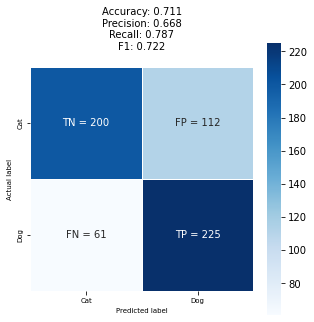

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_cv_bern, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_cv_bern)+'\n'
          +'Precision: {:.3f}'.format(precision_cv_bern)+'\n'
          +'Recall: {:.3f}'.format(recall_cv_bern)+'\n'
          +'F1: {:.3f}'.format(f1_cv_bern)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


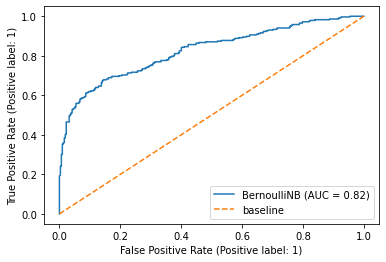

In [12]:
plot_roc_curve(BernNB_cv, X_test_cv_bern, y_test_cv_bern)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Using Multinomial Naive Bayes

##### Train/Test Split

In [13]:
X_train_cv_mn, X_test_cv_mn, y_train_cv_mn, y_test_cv_mn = train_test_split(X_cv,y, test_size= 0.3, random_state=1, shuffle=True)

In [14]:
MultiNB_cv = MultinomialNB()
MultiNB_cv.fit(X_train_cv_mn, y_train_cv_mn)

print(f'CrossVal Score: {cross_val_score(MultiNB_cv, X_train_cv_mn, y_train_cv_mn, cv=5)}')
print(f'Average CrossVal: {cross_val_score(MultiNB_cv, X_train_cv_mn, y_train_cv_mn, cv=5).mean()}')
print(f'Model Score: {MultiNB_cv.score(X_train_cv_mn, y_train_cv_mn)}')

CrossVal Score: [0.86738351 0.86738351 0.88530466 0.88129496 0.88848921]
Average CrossVal: 0.8779711714499367
Model Score: 0.9475951184493898


In [15]:
y_pred_cv_mn = MultiNB_cv.predict(X_test_cv_mn)

accuracy_cv_mn = accuracy_score(y_test_cv_mn, y_pred_cv_mn)
recall_cv_mn = recall_score(y_test_cv_mn, y_pred_cv_mn)
precision_cv_mn = precision_score(y_test_cv_mn, y_pred_cv_mn)
f1_cv_mn = f1_score(y_test_cv_mn, y_pred_cv_mn)

print(f'Prediction Accuracy: {accuracy_cv_mn}\nPrediction Recall: {recall_cv_mn}\nPrediction Precision: {precision_cv_mn}\nPrediction F1: {f1_cv_mn}')

Prediction Accuracy: 0.8963210702341137
Prediction Recall: 0.8671328671328671
Prediction Precision: 0.9117647058823529
Prediction F1: 0.8888888888888888


In [16]:
# Plotting Confusion Matrix

cm_cv_mn = confusion_matrix(y_test_cv_mn, y_pred_cv_mn)

annot_labels = []
for index,value in enumerate(cm_cv_mn):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

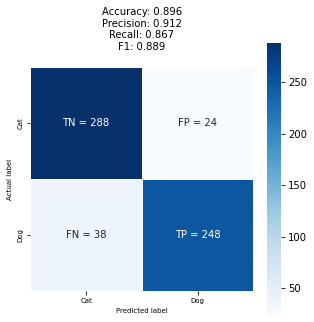

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_cv_mn, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_cv_mn)+'\n'
          +'Precision: {:.3f}'.format(precision_cv_mn)+'\n'
          +'Recall: {:.3f}'.format(recall_cv_mn)+'\n'
          +'F1: {:.3f}'.format(f1_cv_mn)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


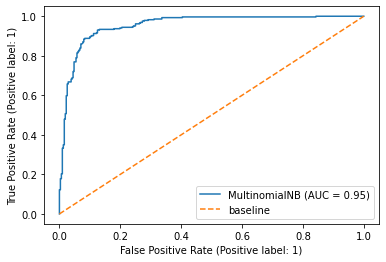

In [18]:
plot_roc_curve(MultiNB_cv, X_test_cv_mn, y_test_cv_mn)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Using Gaussian Naive Bayes

##### Train/Test Split

In [19]:
X_train_cv_ga, X_test_cv_ga, y_train_cv_ga, y_test_cv_ga = train_test_split(X_cv,y, test_size= 0.3, random_state=1, shuffle=True)

In [20]:
GausNB_cv = GaussianNB()
GausNB_cv.fit(X_train_cv_ga, y_train_cv_ga)

print(f'CrossVal Score: {cross_val_score(GausNB_cv, X_train_cv_ga, y_train_cv_ga, cv=5)}')
print(f'Average CrossVal: {cross_val_score(GausNB_cv, X_train_cv_ga, y_train_cv_ga, cv=5).mean()}')
print(f'Model Score: {GausNB_cv.score(X_train_cv_ga, y_train_cv_ga)}')

CrossVal Score: [0.7921147  0.7562724  0.75985663 0.79496403 0.77697842]
Average CrossVal: 0.7760372347283464
Model Score: 0.9188801148600143


In [21]:
y_pred_cv_ga = GausNB_cv.predict(X_test_cv_ga)

accuracy_cv_ga = accuracy_score(y_test_cv_ga, y_pred_cv_ga)
recall_cv_ga = recall_score(y_test_cv_ga, y_pred_cv_ga)
precision_cv_ga = precision_score(y_test_cv_ga, y_pred_cv_ga)
f1_cv_ga = f1_score(y_test_cv_ga, y_pred_cv_ga)

print(f'Prediction Accuracy: {accuracy_cv_ga}\nPrediction Recall: {recall_cv_ga}\nPrediction Precision: {precision_cv_ga}\nPrediction F1: {f1_cv_ga}')

Prediction Accuracy: 0.7642140468227425
Prediction Recall: 0.8181818181818182
Prediction Precision: 0.7244582043343654
Prediction F1: 0.768472906403941


In [22]:
# Plotting Confusion Matrix

cm_cv_ga = confusion_matrix(y_test_cv_ga, y_pred_cv_ga)

annot_labels = []
for index,value in enumerate(cm_cv_ga):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

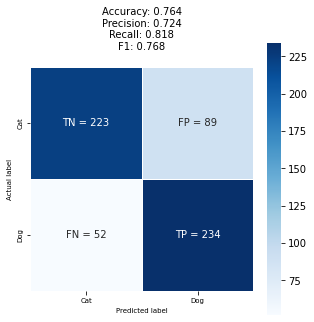

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_cv_ga, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_cv_ga)+'\n'
          +'Precision: {:.3f}'.format(precision_cv_ga)+'\n'
          +'Recall: {:.3f}'.format(recall_cv_ga)+'\n'
          +'F1: {:.3f}'.format(f1_cv_ga)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


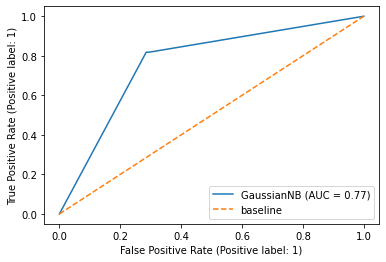

In [24]:
plot_roc_curve(GausNB_cv, X_test_cv_ga, y_test_cv_ga)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

#### Count Vectorizer with N-Grams

##### Using Bernoulli Naive Bayes

##### Train/Test Split

In [25]:
X_train_ng_bern, X_test_ng_bern, y_train_ng_bern, y_test_ng_bern = train_test_split(X_ng,y, test_size= 0.3, random_state=1, shuffle=True)

In [26]:
BernNB_ng = BernoulliNB(binarize=False)
BernNB_ng.fit(X_train_ng_bern, y_train_ng_bern)

print(f'CrossVal Score: {cross_val_score(BernNB_ng, X_train_ng_bern, y_train_ng_bern, cv=5)}')
print(f'Average CrossVal: {cross_val_score(BernNB_ng, X_train_ng_bern, y_train_ng_bern, cv=5).mean()}')
print(f'Model Score: {BernNB_ng.score(X_train_ng_bern, y_train_ng_bern)}')

CrossVal Score: [0.70609319 0.67383513 0.6702509  0.67625899 0.71942446]
Average CrossVal: 0.6891725329413889
Model Score: 0.8370423546302943


In [27]:
y_pred_ng_bern = BernNB_ng.predict(X_test_ng_bern)

accuracy_ng_bern = accuracy_score(y_test_ng_bern, y_pred_ng_bern)
recall_ng_bern = recall_score(y_test_ng_bern, y_pred_ng_bern)
precision_ng_bern = precision_score(y_test_ng_bern, y_pred_ng_bern)
f1_ng_bern = f1_score(y_test_ng_bern, y_pred_ng_bern)

print(f'Prediction Accuracy: {accuracy_ng_bern}\nPrediction Recall: {recall_ng_bern}\nPrediction Precision: {precision_ng_bern}\nPrediction F1: {f1_ng_bern}')

Prediction Accuracy: 0.6923076923076923
Prediction Recall: 0.9090909090909091
Prediction Precision: 0.6220095693779905
Prediction F1: 0.7386363636363635


In [28]:
# Plotting Confusion Matrix

cm_ng_bern = confusion_matrix(y_test_ng_bern, y_pred_ng_bern)

annot_labels = []
for index,value in enumerate(cm_ng_bern):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

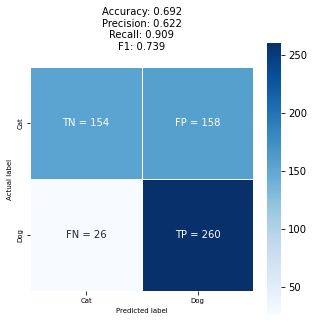

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_ng_bern, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_ng_bern)+'\n'
          +'Precision: {:.3f}'.format(precision_ng_bern)+'\n'
          +'Recall: {:.3f}'.format(recall_ng_bern)+'\n'
          +'F1: {:.3f}'.format(f1_ng_bern)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


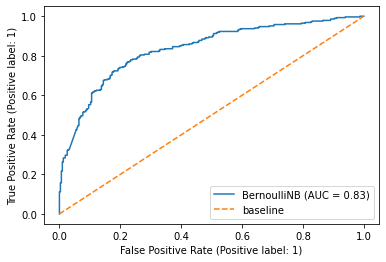

In [30]:
plot_roc_curve(BernNB_ng, X_test_ng_bern, y_test_ng_bern)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Using Multinomial Naive Bayes

##### Train/Test Split

In [31]:
X_train_ng_mn, X_test_ng_mn, y_train_ng_mn, y_test_ng_mn = train_test_split(X_ng,y, test_size= 0.3, random_state=1, shuffle=True)

In [32]:
MultiNB_ng = MultinomialNB()
MultiNB_ng.fit(X_train_ng_mn, y_train_ng_mn)

print(f'CrossVal Score: {cross_val_score(MultiNB_ng, X_train_ng_mn, y_train_ng_mn, cv=5)}')
print(f'Average CrossVal: {cross_val_score(MultiNB_ng, X_train_ng_mn, y_train_ng_mn, cv=5).mean()}')
print(f'Model Score: {MultiNB_ng.score(X_train_ng_mn, y_train_ng_mn)}')

CrossVal Score: [0.76344086 0.7311828  0.75985663 0.75899281 0.74820144]
Average CrossVal: 0.7523349062685336
Model Score: 0.9440057430007178


In [33]:
y_pred_ng_mn = MultiNB_ng.predict(X_test_ng_mn)

accuracy_ng_mn = accuracy_score(y_test_ng_mn, y_pred_ng_mn)
recall_ng_mn = recall_score(y_test_ng_mn, y_pred_ng_mn)
precision_ng_mn = precision_score(y_test_ng_mn, y_pred_ng_mn)
f1_ng_mn = f1_score(y_test_ng_mn, y_pred_ng_mn)

print(f'Prediction Accuracy: {accuracy_ng_mn}\nPrediction Recall: {recall_ng_mn}\nPrediction Precision: {precision_ng_mn}\nPrediction F1: {f1_ng_mn}')

Prediction Accuracy: 0.7675585284280937
Prediction Recall: 0.8076923076923077
Prediction Precision: 0.7333333333333333
Prediction F1: 0.7687188019966723


In [34]:
# Plotting Confusion Matrix

cm_ng_mn = confusion_matrix(y_test_ng_mn, y_pred_ng_mn)

annot_labels = []
for index,value in enumerate(cm_ng_mn):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

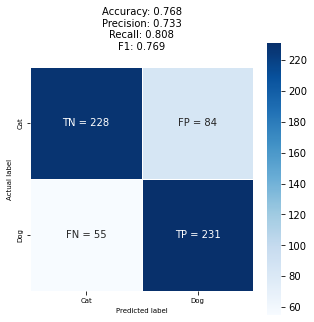

In [35]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_ng_mn, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_ng_mn)+'\n'
          +'Precision: {:.3f}'.format(precision_ng_mn)+'\n'
          +'Recall: {:.3f}'.format(recall_ng_mn)+'\n'
          +'F1: {:.3f}'.format(f1_ng_mn)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


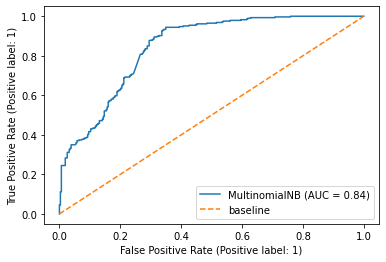

In [36]:
plot_roc_curve(MultiNB_ng, X_test_ng_mn, y_test_ng_mn)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Using Gaussian Naive Bayes

##### Train/Test Split

In [37]:
X_train_ng_ga, X_test_ng_ga, y_train_ng_ga, y_test_ng_ga = train_test_split(X_ng,y, test_size= 0.3, random_state=1, shuffle=True)

In [38]:
GausNB_ng = GaussianNB()
GausNB_ng.fit(X_train_ng_ga, y_train_ng_ga)

print(f'CrossVal Score: {cross_val_score(GausNB_ng, X_train_ng_ga, y_train_ng_ga, cv=5)}')
print(f'Average CrossVal: {cross_val_score(GausNB_ng, X_train_ng_ga, y_train_ng_ga, cv=5).mean()}')
print(f'Model Score: {GausNB_ng.score(X_train_ng_ga, y_train_ng_ga)}')

CrossVal Score: [0.75268817 0.7562724  0.72043011 0.74820144 0.76258993]
Average CrossVal: 0.7480364095820119
Model Score: 0.9669777458722182


In [39]:
y_pred_ng_ga = GausNB_ng.predict(X_test_ng_ga)

accuracy_ng_ga = accuracy_score(y_test_ng_ga, y_pred_ng_ga)
recall_ng_ga = recall_score(y_test_ng_ga, y_pred_ng_ga)
precision_ng_ga = precision_score(y_test_ng_ga, y_pred_ng_ga)
f1_ng_ga = f1_score(y_test_ng_ga, y_pred_ng_ga)

print(f'Prediction Accuracy: {accuracy_ng_ga}\nPrediction Recall: {recall_ng_ga}\nPrediction Precision: {precision_ng_ga}\nPrediction F1: {f1_ng_ga}')

Prediction Accuracy: 0.7408026755852842
Prediction Recall: 0.6398601398601399
Prediction Precision: 0.7787234042553192
Prediction F1: 0.7024952015355086


In [40]:
# Plotting Confusion Matrix

cm_ng_ga = confusion_matrix(y_test_ng_ga, y_pred_ng_ga)

annot_labels = []
for index,value in enumerate(cm_ng_ga):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

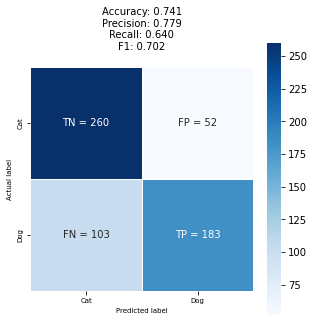

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_ng_ga, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_ng_ga)+'\n'
          +'Precision: {:.3f}'.format(precision_ng_ga)+'\n'
          +'Recall: {:.3f}'.format(recall_ng_ga)+'\n'
          +'F1: {:.3f}'.format(f1_ng_ga)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


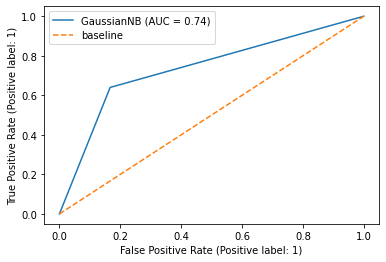

In [42]:
plot_roc_curve(GausNB_ng, X_test_ng_ga, y_test_ng_ga)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

#### TF-IDF Term Frequency - Inverse Document Frequency

##### Using Bernoulli Naive Bayes

##### Train/Test Split

In [43]:
X_train_tfidf_bern, X_test_tfidf_bern, y_train_tfidf_bern, y_test_tfidf_bern = train_test_split(X_tfidf,y, test_size= 0.3, random_state=1, shuffle=True)

In [44]:
BernNB_tfidf = BernoulliNB(binarize=False)
BernNB_tfidf.fit(X_train_tfidf_bern, y_train_tfidf_bern)

print(f'CrossVal Score: {cross_val_score(BernNB_tfidf, X_train_tfidf_bern, y_train_tfidf_bern, cv=5)}')
print(f'Average CrossVal: {cross_val_score(BernNB_tfidf, X_train_tfidf_bern, y_train_tfidf_bern, cv=5).mean()}')
print(f'Model Score: {BernNB_tfidf.score(X_train_tfidf_bern, y_train_tfidf_bern)}')

CrossVal Score: [0.7562724  0.72759857 0.6953405  0.73021583 0.78057554]
Average CrossVal: 0.738000567288105
Model Score: 0.83632447954056


In [45]:
y_pred_tfidf_bern = BernNB_tfidf.predict(X_test_tfidf_bern)

accuracy_tfidf_bern = accuracy_score(y_test_tfidf_bern, y_pred_tfidf_bern)
recall_tfidf_bern = recall_score(y_test_tfidf_bern, y_pred_tfidf_bern)
precision_tfidf_bern = precision_score(y_test_tfidf_bern, y_pred_tfidf_bern)
f1_tfidf_bern = f1_score(y_test_tfidf_bern, y_pred_tfidf_bern)

print(f'Prediction Accuracy: {accuracy_tfidf_bern}\nPrediction Recall: {recall_tfidf_bern}\nPrediction Precision: {precision_tfidf_bern}\nPrediction F1: {f1_tfidf_bern}')

Prediction Accuracy: 0.7073578595317725
Prediction Recall: 0.8041958041958042
Prediction Precision: 0.6590257879656161
Prediction F1: 0.7244094488188977


In [46]:
# Plotting Confusion Matrix

cm_tfidf_bern = confusion_matrix(y_test_tfidf_bern, y_pred_tfidf_bern)

annot_labels = []
for index,value in enumerate(cm_tfidf_bern):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

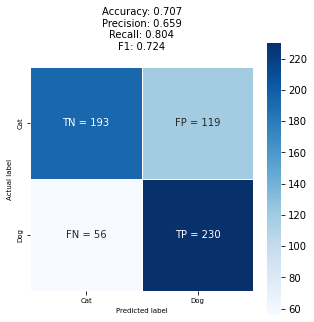

In [47]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_tfidf_bern, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_tfidf_bern)+'\n'
          +'Precision: {:.3f}'.format(precision_tfidf_bern)+'\n'
          +'Recall: {:.3f}'.format(recall_tfidf_bern)+'\n'
          +'F1: {:.3f}'.format(f1_tfidf_bern)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


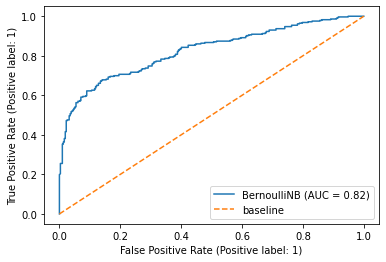

In [48]:
plot_roc_curve(BernNB_tfidf, X_test_tfidf_bern, y_test_tfidf_bern)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Using Multinomial Naive Bayes

##### Train/Test Split

In [49]:
X_train_tfidf_mn, X_test_tfidf_mn, y_train_tfidf_mn, y_test_tfidf_mn = train_test_split(X_tfidf,y, test_size= 0.3, random_state=1, shuffle=True)

In [50]:
MultiNB_tfidf = MultinomialNB()
MultiNB_tfidf.fit(X_train_tfidf_mn, y_train_tfidf_mn)

print(f'CrossVal Score: {cross_val_score(MultiNB_tfidf, X_train_tfidf_mn, y_train_tfidf_mn, cv=5)}')
print(f'Average CrossVal: {cross_val_score(MultiNB_tfidf, X_train_tfidf_mn, y_train_tfidf_mn, cv=5).mean()}')
print(f'Model Score: {MultiNB_tfidf.score(X_train_tfidf_mn, y_train_tfidf_mn)}')

CrossVal Score: [0.7921147  0.78136201 0.78494624 0.81654676 0.79856115]
Average CrossVal: 0.794706170547433
Model Score: 0.9339554917444365


In [51]:
y_pred_tfidf_mn = MultiNB_tfidf.predict(X_test_tfidf_mn)

accuracy_tfidf_mn = accuracy_score(y_test_tfidf_mn, y_pred_tfidf_mn)
recall_tfidf_mn = recall_score(y_test_tfidf_mn, y_pred_tfidf_mn)
precision_tfidf_mn = precision_score(y_test_tfidf_mn, y_pred_tfidf_mn)
f1_tfidf_mn = f1_score(y_test_tfidf_mn, y_pred_tfidf_mn)

print(f'Prediction Accuracy: {accuracy_tfidf_mn}\nPrediction Recall: {recall_tfidf_mn}\nPrediction Precision: {precision_tfidf_mn}\nPrediction F1: {f1_tfidf_mn}')

Prediction Accuracy: 0.8344481605351171
Prediction Recall: 0.6748251748251748
Prediction Precision: 0.9698492462311558
Prediction F1: 0.7958762886597938


In [52]:
# Plotting Confusion Matrix

cm_tfidf_mn = confusion_matrix(y_test_tfidf_mn, y_pred_tfidf_mn)

annot_labels = []
for index,value in enumerate(cm_tfidf_mn):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

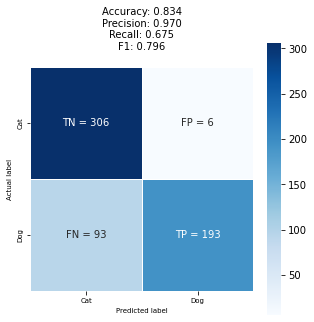

In [53]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_tfidf_mn, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_tfidf_mn)+'\n'
          +'Precision: {:.3f}'.format(precision_tfidf_mn)+'\n'
          +'Recall: {:.3f}'.format(recall_tfidf_mn)+'\n'
          +'F1: {:.3f}'.format(f1_tfidf_mn)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


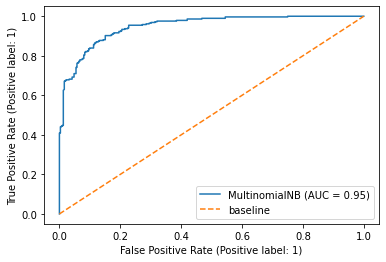

In [54]:
plot_roc_curve(MultiNB_tfidf, X_test_tfidf_mn, y_test_tfidf_mn)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Using Gaussian Naive Bayes

##### Train/Test Split

In [55]:
X_train_tfidf_ga, X_test_tfidf_ga, y_train_tfidf_ga, y_test_tfidf_ga = train_test_split(X_tfidf,y, test_size= 0.3, random_state=1, shuffle=True)

In [56]:
GausNB_tfidf = GaussianNB()
GausNB_tfidf.fit(X_train_tfidf_ga, y_train_tfidf_ga)

print(f'CrossVal Score: {cross_val_score(GausNB_tfidf, X_train_tfidf_ga, y_train_tfidf_ga, cv=5)}')
print(f'Average CrossVal: {cross_val_score(GausNB_tfidf, X_train_tfidf_ga, y_train_tfidf_ga, cv=5).mean()}')
print(f'Model Score: {GausNB_tfidf.score(X_train_tfidf_ga, y_train_tfidf_ga)}')

CrossVal Score: [0.72759857 0.74551971 0.72401434 0.79496403 0.74820144]
Average CrossVal: 0.748059616822671
Model Score: 0.9770279971284996


In [57]:
y_pred_tfidf_ga = GausNB_tfidf.predict(X_test_tfidf_ga)

accuracy_tfidf_ga = accuracy_score(y_test_tfidf_ga, y_pred_tfidf_ga)
recall_tfidf_ga = recall_score(y_test_tfidf_ga, y_pred_tfidf_ga)
precision_tfidf_ga = precision_score(y_test_tfidf_ga, y_pred_tfidf_ga)
f1_tfidf_ga = f1_score(y_test_tfidf_ga, y_pred_tfidf_ga)

print(f'Prediction Accuracy: {accuracy_tfidf_ga}\nPrediction Recall: {recall_tfidf_ga}\nPrediction Precision: {precision_tfidf_ga}\nPrediction F1: {f1_tfidf_ga}')

Prediction Accuracy: 0.7290969899665551
Prediction Recall: 0.7447552447552448
Prediction Precision: 0.7052980132450332
Prediction F1: 0.7244897959183674


In [58]:
# Plotting Confusion Matrix

cm_tfidf_ga = confusion_matrix(y_test_tfidf_ga, y_pred_tfidf_ga)

annot_labels = []
for index,value in enumerate(cm_tfidf_ga):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

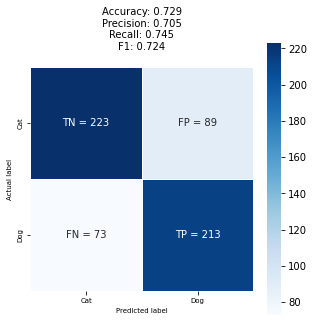

In [59]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_tfidf_ga, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_tfidf_ga)+'\n'
          +'Precision: {:.3f}'.format(precision_tfidf_ga)+'\n'
          +'Recall: {:.3f}'.format(recall_tfidf_ga)+'\n'
          +'F1: {:.3f}'.format(f1_tfidf_ga)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


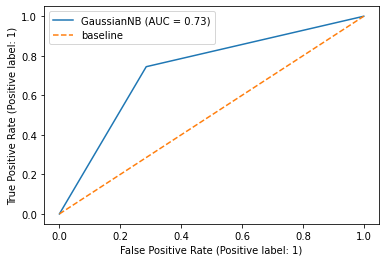

In [60]:
plot_roc_curve(GausNB_tfidf, X_test_tfidf_ga, y_test_tfidf_ga)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

### Logistic Regression

#### Count Vectorizer

##### Train/Test Split

In [61]:
X_train_cv_lr, X_test_cv_lr, y_train_cv_lr, y_test_cv_lr = train_test_split(X_cv,y, test_size= 0.3, random_state=1, shuffle=True)

In [62]:
LogReg_cv = LogisticRegression(solver='liblinear')
LogReg_cv.fit(X_train_cv_lr, y_train_cv_lr)

print(f'CrossVal Score: {cross_val_score(LogReg_cv, X_train_cv_lr, y_train_cv_lr, cv=5)}')
print(f'Average CrossVal: {cross_val_score(LogReg_cv, X_train_cv_lr, y_train_cv_lr, cv=5).mean()}')
print(f'Model Score: {LogReg_cv.score(X_train_cv_lr, y_train_cv_lr)}')

CrossVal Score: [0.86021505 0.85663082 0.83870968 0.81294964 0.86690647]
Average CrossVal: 0.847082334132694
Model Score: 0.9964106245513281


In [63]:
y_pred_cv_lr = LogReg_cv.predict(X_test_cv_lr)

accuracy_cv_lr = accuracy_score(y_test_cv_lr, y_pred_cv_lr)
recall_cv_lr = recall_score(y_test_cv_lr, y_pred_cv_lr)
precision_cv_lr = precision_score(y_test_cv_lr, y_pred_cv_lr)
f1_cv_lr = f1_score(y_test_cv_lr, y_pred_cv_lr)

print(f'Prediction Accuracy: {accuracy_cv_lr}\nPrediction Recall: {recall_cv_lr}\nPrediction Precision: {precision_cv_lr}\nPrediction F1: {f1_cv_lr}')

Prediction Accuracy: 0.8444816053511706
Prediction Recall: 0.8916083916083916
Prediction Precision: 0.804416403785489
Prediction F1: 0.8457711442786069


In [64]:
# Plotting Confusion Matrix

cm_cv_lr = confusion_matrix(y_test_cv_lr, y_pred_cv_lr)

annot_labels = []
for index,value in enumerate(cm_cv_lr):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

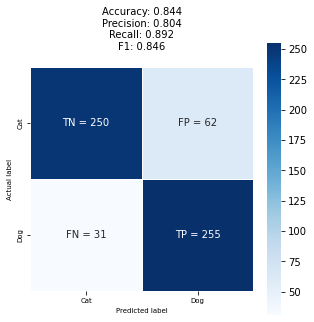

In [65]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_cv_lr, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_cv_lr)+'\n'
          +'Precision: {:.3f}'.format(precision_cv_lr)+'\n'
          +'Recall: {:.3f}'.format(recall_cv_lr)+'\n'
          +'F1: {:.3f}'.format(f1_cv_lr)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


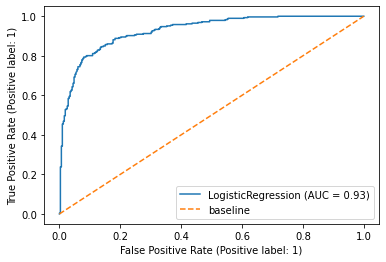

In [66]:
plot_roc_curve(LogReg_cv, X_test_cv_lr, y_test_cv_lr)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Looking at Coefficients

In [67]:
# Check out coefficients
pd.Series(LogReg_cv.coef_[0], index = X_test_cv_lr.columns).sort_values()

kitten   -1.895534
litter   -1.553373
kitty    -1.496556
tree     -1.091320
box      -1.082560
            ...   
crate     0.988500
walk      1.351304
pup       1.422296
mix       1.471938
puppy     1.886087
Length: 3743, dtype: float64

#### Count Vectorizer with N-Grams

##### Train/Test Split

In [68]:
X_train_ng_lr, X_test_ng_lr, y_train_ng_lr, y_test_ng_lr = train_test_split(X_ng,y, test_size= 0.3, random_state=1, shuffle=True)

In [69]:
LogReg_ng = LogisticRegression(solver='liblinear')
LogReg_ng.fit(X_train_ng_lr, y_train_ng_lr)

print(f'CrossVal Score: {cross_val_score(LogReg_ng, X_train_ng_lr, y_train_ng_lr, cv=5)}')
print(f'Average CrossVal: {cross_val_score(LogReg_ng, X_train_ng_lr, y_train_ng_lr, cv=5).mean()}')
print(f'Model Score: {LogReg_ng.score(X_train_ng_lr, y_train_ng_lr)}')

CrossVal Score: [0.70609319 0.73476703 0.74551971 0.74100719 0.72302158]
Average CrossVal: 0.7300817410587659
Model Score: 0.9755922469490309


In [70]:
y_pred_ng_lr = LogReg_ng.predict(X_test_ng_lr)

accuracy_ng_lr = accuracy_score(y_test_ng_lr, y_pred_ng_lr)
recall_ng_lr = recall_score(y_test_ng_lr, y_pred_ng_lr)
precision_ng_lr = precision_score(y_test_ng_lr, y_pred_ng_lr)
f1_ng_lr = f1_score(y_test_ng_lr, y_pred_ng_lr)

print(f'Prediction Accuracy: {accuracy_ng_lr}\nPrediction Recall: {recall_ng_lr}\nPrediction Precision: {precision_ng_lr}\nPrediction F1: {f1_ng_lr}')

Prediction Accuracy: 0.7424749163879598
Prediction Recall: 0.8776223776223776
Prediction Precision: 0.6783783783783783
Prediction F1: 0.7652439024390244


In [71]:
# Plotting Confusion Matrix

cm_ng_lr = confusion_matrix(y_test_ng_lr, y_pred_ng_lr)

annot_labels = []
for index,value in enumerate(cm_ng_lr):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

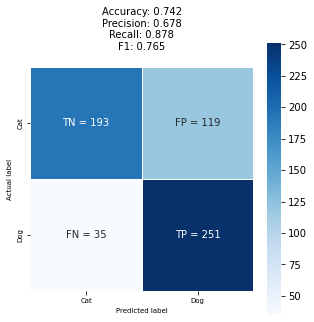

In [72]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_ng_lr, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_ng_lr)+'\n'
          +'Precision: {:.3f}'.format(precision_ng_lr)+'\n'
          +'Recall: {:.3f}'.format(recall_ng_lr)+'\n'
          +'F1: {:.3f}'.format(f1_ng_lr)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


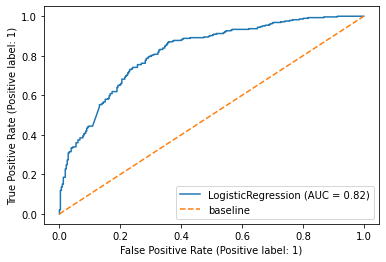

In [73]:
plot_roc_curve(LogReg_ng, X_test_ng_lr, y_test_ng_lr)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Looking at Coefficients

In [74]:
# Check out coefficients
pd.Series(LogReg_ng.coef_[0], index = X_test_ng_lr.columns).sort_values()

litter box         -2.134546
old kitten         -1.807623
wet food           -1.383652
new kitten         -1.373925
christmas tree     -1.084775
                      ...   
since puppy         0.794053
acting normal       0.832903
new puppy           0.853332
golden retriever    0.856814
old puppy           0.895630
Length: 4900, dtype: float64

#### TF-IDF Term Frequency - Inverse Document Frequency

##### Train/Test Split

In [75]:
X_train_tfidf_lr, X_test_tfidf_lr, y_train_tfidf_lr, y_test_tfidf_lr = train_test_split(X_tfidf,y, test_size= 0.3, random_state=1, shuffle=True)

In [76]:
LogReg_tfidf = LogisticRegression(solver='liblinear')
LogReg_tfidf.fit(X_train_tfidf_lr, y_train_tfidf_lr)

print(f'CrossVal Score: {cross_val_score(LogReg_tfidf, X_train_tfidf_lr, y_train_tfidf_lr, cv=5)}')
print(f'Average CrossVal: {cross_val_score(LogReg_tfidf, X_train_tfidf_lr, y_train_tfidf_lr, cv=5).mean()}')
print(f'Model Score: {LogReg_tfidf.score(X_train_tfidf_lr, y_train_tfidf_lr)}')

CrossVal Score: [0.87096774 0.83154122 0.83154122 0.84892086 0.86690647]
Average CrossVal: 0.8499755034681933
Model Score: 0.9612347451543432


In [77]:
y_pred_tfidf_lr = LogReg_tfidf.predict(X_test_tfidf_lr)

accuracy_tfidf_lr = accuracy_score(y_test_tfidf_lr, y_pred_tfidf_lr)
recall_tfidf_lr = recall_score(y_test_tfidf_lr, y_pred_tfidf_lr)
precision_tfidf_lr = precision_score(y_test_tfidf_lr, y_pred_tfidf_lr)
f1_tfidf_lr = f1_score(y_test_tfidf_lr, y_pred_tfidf_lr)

print(f'Prediction Accuracy: {accuracy_tfidf_lr}\nPrediction Recall: {recall_tfidf_lr}\nPrediction Precision: {precision_tfidf_lr}\nPrediction F1: {f1_tfidf_lr}')

Prediction Accuracy: 0.8578595317725752
Prediction Recall: 0.8951048951048951
Prediction Precision: 0.8231511254019293
Prediction F1: 0.8576214405360133


In [78]:
# Plotting Confusion Matrix

cm_tfidf_lr = confusion_matrix(y_test_tfidf_lr, y_pred_tfidf_lr)

annot_labels = []
for index,value in enumerate(cm_tfidf_lr):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

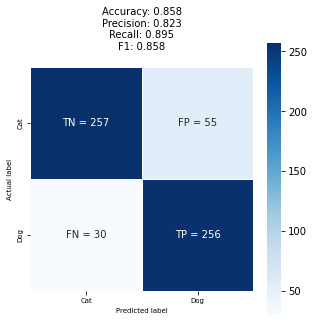

In [79]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_tfidf_lr, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_tfidf_lr)+'\n'
          +'Precision: {:.3f}'.format(precision_tfidf_lr)+'\n'
          +'Recall: {:.3f}'.format(recall_tfidf_lr)+'\n'
          +'F1: {:.3f}'.format(f1_tfidf_lr)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


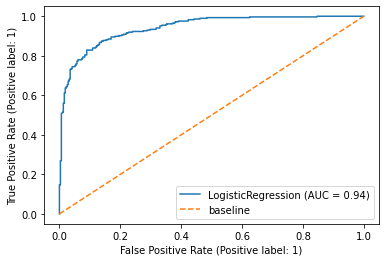

In [80]:
plot_roc_curve(LogReg_tfidf, X_test_tfidf_lr, y_test_tfidf_lr)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Looking at Coefficients

In [81]:
# Check out coefficients
pd.Series(LogReg_tfidf.coef_[0], index = X_test_tfidf_lr.columns).sort_values()

kitten   -4.566564
litter   -3.329829
box      -2.210080
food     -2.065797
kitty    -1.959605
            ...   
crate     1.673324
mix       1.761495
pup       1.977699
walk      2.106425
puppy     3.239099
Length: 10880, dtype: float64

### KNN

#### Count Vectorizer

##### Train/Test Split

In [82]:
X_train_cv_knn, X_test_cv_knn, y_train_cv_knn, y_test_cv_knn = train_test_split(X_cv,y, test_size= 0.3, random_state=1, shuffle=True)

In [83]:
# Instantiate a class instance of KNN class with an initial parameter value
knn_cv = KNeighborsClassifier(n_neighbors=3)

knn_cv.fit(X_train_cv_knn, y_train_cv_knn)

print(f'CrossVal Score: {cross_val_score(knn_cv, X_train_cv_knn, y_train_cv_knn, cv=5)}')
print(f'Average CrossVal: {cross_val_score(knn_cv, X_train_cv_knn, y_train_cv_knn, cv=5).mean()}')
print(f'Model Score: {knn_cv.score(X_train_cv_knn, y_train_cv_knn)}')

CrossVal Score: [0.609319   0.63799283 0.57706093 0.6618705  0.65827338]
Average CrossVal: 0.6289033289497434
Model Score: 0.782483847810481


In [84]:
y_pred_cv_knn = knn_cv.predict(X_test_cv_knn)

accuracy_cv_knn = accuracy_score(y_test_cv_knn, y_pred_cv_knn)
recall_cv_knn = recall_score(y_test_cv_knn, y_pred_cv_knn)
precision_cv_knn = precision_score(y_test_cv_knn, y_pred_cv_knn)
f1_cv_knn = f1_score(y_test_cv_knn, y_pred_cv_knn)

print(f'Prediction Accuracy: {accuracy_cv_knn}\nPrediction Recall: {recall_cv_knn}\nPrediction Precision: {precision_cv_knn}\nPrediction F1: {f1_cv_knn}')

Prediction Accuracy: 0.6036789297658863
Prediction Recall: 0.9405594405594405
Prediction Precision: 0.5501022494887525
Prediction F1: 0.6941935483870968


In [85]:
# Plotting Confusion Matrix

cm_cv_knn = confusion_matrix(y_test_cv_knn, y_pred_cv_knn)

annot_labels = []
for index,value in enumerate(cm_cv_knn):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

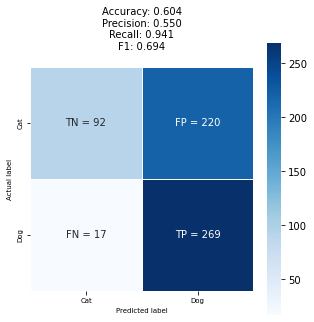

In [86]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_cv_knn, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_cv_knn)+'\n'
          +'Precision: {:.3f}'.format(precision_cv_knn)+'\n'
          +'Recall: {:.3f}'.format(recall_cv_knn)+'\n'
          +'F1: {:.3f}'.format(f1_cv_knn)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


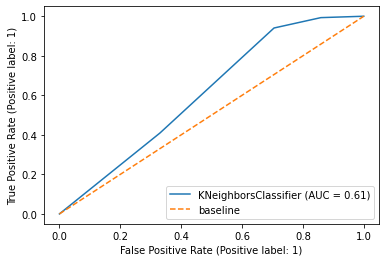

In [87]:
plot_roc_curve(knn_cv, X_test_cv_knn, y_test_cv_knn)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Count Vectorizer with N-Grams

##### Train/Test Split

In [88]:
X_train_ng_knn, X_test_ng_knn, y_train_ng_knn, y_test_ng_knn = train_test_split(X_ng,y, test_size= 0.3, random_state=1, shuffle=True)

In [89]:
# Instantiate a class instance of KNN class with an initial parameter value
knn_ng = KNeighborsClassifier(n_neighbors=3)

knn_ng.fit(X_train_ng_knn, y_train_ng_knn)

print(f'CrossVal Score: {cross_val_score(knn_ng, X_train_ng_knn, y_train_ng_knn, cv=5)}')
print(f'Average CrossVal: {cross_val_score(knn_ng, X_train_ng_knn, y_train_ng_knn, cv=5).mean()}')
print(f'Model Score: {knn_ng.score(X_train_ng_knn, y_train_ng_knn)}')

CrossVal Score: [0.53046595 0.53405018 0.53046595 0.5971223  0.54676259]
Average CrossVal: 0.5477733941878755
Model Score: 0.6267049533381192


In [90]:
y_pred_ng_knn = knn_ng.predict(X_test_ng_knn)

accuracy_ng_knn = accuracy_score(y_test_ng_knn, y_pred_ng_knn)
recall_ng_knn = recall_score(y_test_ng_knn, y_pred_ng_knn)
precision_ng_knn = precision_score(y_test_ng_knn, y_pred_ng_knn)
f1_ng_knn = f1_score(y_test_ng_knn, y_pred_ng_knn)

print(f'Prediction Accuracy: {accuracy_ng_knn}\nPrediction Recall: {recall_ng_knn}\nPrediction Precision: {precision_ng_knn}\nPrediction F1: {f1_ng_knn}')

Prediction Accuracy: 0.5284280936454849
Prediction Recall: 0.993006993006993
Prediction Precision: 0.5035460992907801
Prediction F1: 0.668235294117647


In [91]:
# Plotting Confusion Matrix

cm_ng_knn = confusion_matrix(y_test_ng_knn, y_pred_ng_knn)

annot_labels = []
for index,value in enumerate(cm_ng_knn):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

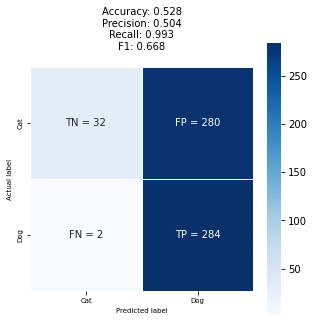

In [92]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_ng_knn, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_ng_knn)+'\n'
          +'Precision: {:.3f}'.format(precision_ng_knn)+'\n'
          +'Recall: {:.3f}'.format(recall_ng_knn)+'\n'
          +'F1: {:.3f}'.format(f1_ng_knn)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


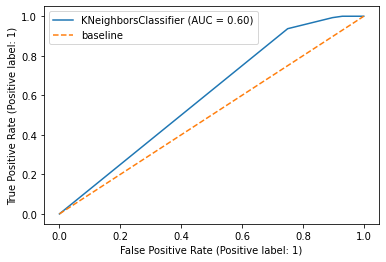

In [93]:
plot_roc_curve(knn_ng, X_test_ng_knn, y_test_ng_knn)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

#### TF-IDF Term Frequency - Inverse Document Frequency

##### Train/Test Split

In [94]:
X_train_tfidf_knn, X_test_tfidf_knn, y_train_tfidf_knn, y_test_tfidf_knn = train_test_split(X_tfidf,y, test_size= 0.3, random_state=1, shuffle=True)

In [95]:
# Instantiate a class instance of KNN class with an initial parameter value
knn_tfidf = KNeighborsClassifier(n_neighbors=3)

knn_tfidf.fit(X_train_tfidf_knn, y_train_tfidf_knn)

print(f'CrossVal Score: {cross_val_score(knn_tfidf, X_train_tfidf_knn, y_train_tfidf_knn, cv=5)}')
print(f'Average CrossVal: {cross_val_score(knn_tfidf, X_train_tfidf_knn, y_train_tfidf_knn, cv=5).mean()}')
print(f'Model Score: {knn_tfidf.score(X_train_tfidf_knn, y_train_tfidf_knn)}')

CrossVal Score: [0.76702509 0.72759857 0.74551971 0.78776978 0.78057554]
Average CrossVal: 0.7616977385833269
Model Score: 0.8693467336683417


In [96]:
y_pred_tfidf_knn = knn_tfidf.predict(X_test_tfidf_knn)

accuracy_tfidf_knn = accuracy_score(y_test_tfidf_knn, y_pred_tfidf_knn)
recall_tfidf_knn = recall_score(y_test_tfidf_knn, y_pred_tfidf_knn)
precision_tfidf_knn = precision_score(y_test_tfidf_knn, y_pred_tfidf_knn)
f1_tfidf_knn = f1_score(y_test_tfidf_knn, y_pred_tfidf_knn)

print(f'Prediction Accuracy: {accuracy_tfidf_knn}\nPrediction Recall: {recall_tfidf_knn}\nPrediction Precision: {precision_tfidf_knn}\nPrediction F1: {f1_tfidf_knn}')

Prediction Accuracy: 0.8160535117056856
Prediction Recall: 0.8041958041958042
Prediction Precision: 0.8098591549295775
Prediction F1: 0.8070175438596491


In [97]:
# Plotting Confusion Matrix

cm_tfidf_knn = confusion_matrix(y_test_tfidf_knn, y_pred_tfidf_knn)

annot_labels = []
for index,value in enumerate(cm_tfidf_knn):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

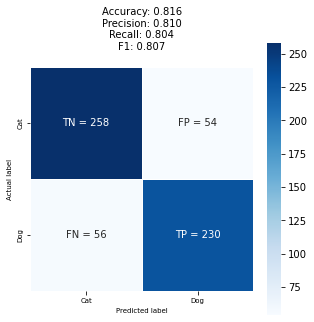

In [98]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_tfidf_knn, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_tfidf_knn)+'\n'
          +'Precision: {:.3f}'.format(precision_tfidf_knn)+'\n'
          +'Recall: {:.3f}'.format(recall_tfidf_knn)+'\n'
          +'F1: {:.3f}'.format(f1_tfidf_knn)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


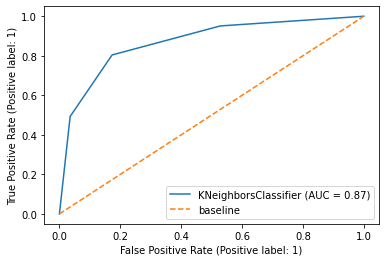

In [99]:
plot_roc_curve(knn_tfidf, X_test_tfidf_knn, y_test_tfidf_knn)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

### Random Forest

##### Count Vectorizer

In [100]:
X_train_cv_rf, X_test_cv_rf, y_train_cv_rf, y_test_cv_rf = train_test_split(X_cv,y, test_size= 0.3, random_state=1, shuffle=True)

In [101]:
rf_cv = RandomForestClassifier(n_estimators=200, random_state=1)

y_train_cv_rf_array = np.ravel(y_train_cv_rf)
rf_cv.fit(X_train_cv_rf, y_train_cv_rf_array)

print(f'CrossVal Score: {cross_val_score(rf_cv, X_train_cv_rf, y_train_cv_rf_array, cv=5)}')
print(f'Average CrossVal: {cross_val_score(rf_cv, X_train_cv_rf, y_train_cv_rf_array, cv=5).mean()}')
print(f'Model Score: {rf_cv.score(X_train_cv_rf, y_train_cv_rf_array)}')

CrossVal Score: [0.81362007 0.77060932 0.74193548 0.80935252 0.81654676]
Average CrossVal: 0.7904128310255022
Model Score: 0.9992821249102656


In [102]:
y_pred_cv_rf = rf_cv.predict(X_test_cv_rf)

accuracy_cv_rf = accuracy_score(y_test_cv_rf, y_pred_cv_rf)
recall_cv_rf = recall_score(y_test_cv_rf, y_pred_cv_rf)
precision_cv_rf = precision_score(y_test_cv_rf, y_pred_cv_rf)
f1_cv_rf = f1_score(y_test_cv_rf, y_pred_cv_rf)

print(f'Prediction Accuracy: {accuracy_cv_rf}\nPrediction Recall: {recall_cv_rf}\nPrediction Precision: {precision_cv_rf}\nPrediction F1: {f1_cv_rf}')

Prediction Accuracy: 0.8110367892976589
Prediction Recall: 0.7867132867132867
Prediction Precision: 0.8122743682310469
Prediction F1: 0.7992895204262876


In [103]:
# Plotting Confusion Matrix

cm_cv_rf = confusion_matrix(y_test_cv_rf, y_pred_cv_rf)

annot_labels = []
for index,value in enumerate(cm_cv_rf):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

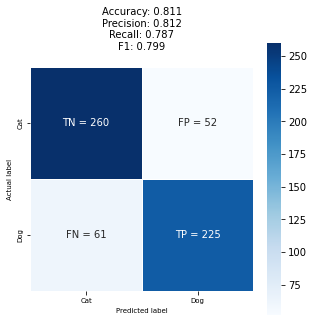

In [104]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_cv_rf, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_cv_rf)+'\n'
          +'Precision: {:.3f}'.format(precision_cv_rf)+'\n'
          +'Recall: {:.3f}'.format(recall_cv_rf)+'\n'
          +'F1: {:.3f}'.format(f1_cv_rf)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


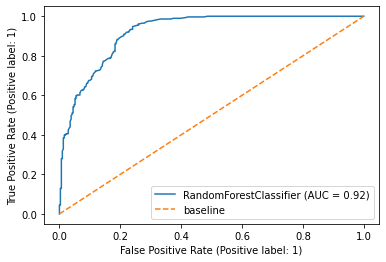

In [105]:
plot_roc_curve(rf_cv, X_test_cv_rf, y_test_cv_rf)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

##### Count Vectorizer with N-Grams

##### Train/Test Split

In [106]:
X_train_ng_rf, X_test_ng_rf, y_train_ng_rf, y_test_ng_rf = train_test_split(X_ng,y, test_size= 0.3, random_state=1, shuffle=True)

In [107]:
rf_ng = RandomForestClassifier(n_estimators=200, random_state=1)

y_train_ng_rf_array = np.ravel(y_train_ng_rf)
rf_ng.fit(X_train_ng_rf, y_train_ng_rf_array)

print(f'CrossVal Score: {cross_val_score(rf_ng, X_train_ng_rf, y_train_ng_rf_array, cv=5)}')
print(f'Average CrossVal: {cross_val_score(rf_ng, X_train_ng_rf, y_train_ng_rf_array, cv=5).mean()}')
print(f'Model Score: {rf_ng.score(X_train_ng_rf, y_train_ng_rf_array)}')

CrossVal Score: [0.68100358 0.70250896 0.68817204 0.68345324 0.71223022]
Average CrossVal: 0.6934736082102061
Model Score: 0.9913854989231874


In [108]:
y_pred_ng_rf = rf_ng.predict(X_test_ng_rf)

accuracy_ng_rf = accuracy_score(y_test_ng_rf, y_pred_ng_rf)
recall_ng_rf = recall_score(y_test_ng_rf, y_pred_ng_rf)
precision_ng_rf = precision_score(y_test_ng_rf, y_pred_ng_rf)
f1_ng_rf = f1_score(y_test_ng_rf, y_pred_ng_rf)

print(f'Prediction Accuracy: {accuracy_ng_rf}\nPrediction Recall: {recall_ng_rf}\nPrediction Precision: {precision_ng_rf}\nPrediction F1: {f1_ng_rf}')

Prediction Accuracy: 0.6889632107023411
Prediction Recall: 0.8286713286713286
Prediction Precision: 0.6336898395721925
Prediction F1: 0.7181818181818183


In [109]:
# Plotting Confusion Matrix

cm_ng_rf = confusion_matrix(y_test_ng_rf, y_pred_ng_rf)

annot_labels = []
for index,value in enumerate(cm_ng_rf):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

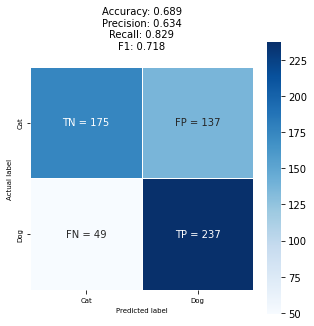

In [110]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_ng_rf, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_ng_rf)+'\n'
          +'Precision: {:.3f}'.format(precision_ng_rf)+'\n'
          +'Recall: {:.3f}'.format(recall_ng_rf)+'\n'
          +'F1: {:.3f}'.format(f1_ng_rf)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


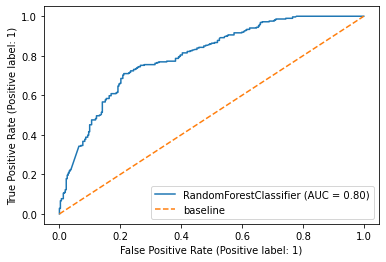

In [111]:
plot_roc_curve(rf_ng, X_test_ng_rf, y_test_ng_rf)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

#### TF-IDF Term Frequency - Inverse Document Frequency

###### Train/Test Split

In [112]:
X_train_tfidf_rf, X_test_tfidf_rf, y_train_tfidf_rf, y_test_tfidf_rf = train_test_split(X_tfidf,y, test_size= 0.3, random_state=1, shuffle=True)

In [113]:
rf_tfidf = RandomForestClassifier(n_estimators=200, random_state=1)

y_train_tfidf_rf_array = np.ravel(y_train_tfidf_rf)
rf_tfidf.fit(X_train_tfidf_rf, y_train_tfidf_rf_array)

print(f'CrossVal Score: {cross_val_score(rf_tfidf, X_train_tfidf_rf, y_train_tfidf_rf_array, cv=5)}')
print(f'Average CrossVal: {cross_val_score(rf_tfidf, X_train_tfidf_rf, y_train_tfidf_rf_array, cv=5).mean()}')
print(f'Model Score: {rf_tfidf.score(X_train_tfidf_rf, y_train_tfidf_rf_array)}')

CrossVal Score: [0.8172043  0.78853047 0.72401434 0.82374101 0.83093525]
Average CrossVal: 0.7968850725870916
Model Score: 1.0


In [114]:
y_pred_tfidf_rf = rf_tfidf.predict(X_test_tfidf_rf)

accuracy_tfidf_rf = accuracy_score(y_test_tfidf_rf, y_pred_tfidf_rf)
recall_tfidf_rf = recall_score(y_test_tfidf_rf, y_pred_tfidf_rf)
precision_tfidf_rf = precision_score(y_test_tfidf_rf, y_pred_tfidf_rf)
f1_tfidf_rf = f1_score(y_test_tfidf_rf, y_pred_tfidf_rf)

print(f'Prediction Accuracy: {accuracy_tfidf_rf}\nPrediction Recall: {recall_tfidf_rf}\nPrediction Precision: {precision_tfidf_rf}\nPrediction F1: {f1_tfidf_rf}')

Prediction Accuracy: 0.7959866220735786
Prediction Recall: 0.7552447552447552
Prediction Precision: 0.8059701492537313
Prediction F1: 0.779783393501805


In [115]:
# Plotting Confusion Matrix

cm_tfidf_rf = confusion_matrix(y_test_tfidf_rf, y_pred_tfidf_rf)

annot_labels = []
for index,value in enumerate(cm_tfidf_rf):
    if index == 0:
        annot_labels.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        annot_labels.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])]);

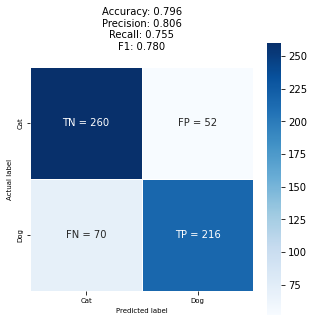

In [119]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_tfidf_rf, annot=np.array(annot_labels),
            fmt="",
            annot_kws={"size": 10},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['Cat', 'Dog'],
            yticklabels = ['Cat', 'Dog'],
            );

plt.ylabel('Actual label', fontsize = 7);
plt.xlabel('Predicted label', fontsize = 7);
plt.title('Accuracy: {:.3f}'.format(accuracy_tfidf_rf)+'\n'
          +'Precision: {:.3f}'.format(precision_tfidf_rf)+'\n'
          +'Recall: {:.3f}'.format(recall_tfidf_rf)+'\n'
          +'F1: {:.3f}'.format(f1_tfidf_rf)+'\n', size = 10);
plt.tick_params(labelsize= 7)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


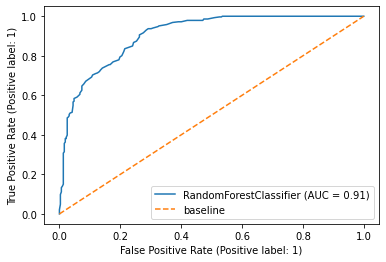

In [120]:
plot_roc_curve(rf_tfidf, X_test_tfidf_rf, y_test_tfidf_rf)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

## Conclusions on Baseline Modelling

In order to interpret our results we first need to understand the types of metrics that are used.

* Cross Val Score:
    Average estimation of the skill of our model on unseen data. It uses a small sample in order to estimate how the model is expected to perform
* Train Score: 
    How well is our model doing on our training data
* Test Accuracy: 
    Accuracy of our model on the test data. It is measured as a percentage of correct predictions on the total amount of predictions
* Recall: 
    Also know as sensitivity, it represent the ratio of correctly predicted positive observations on the totral observations in a particular class
* Precision:
    Represent the ratio of correctly predicted positive observations to the total positive observations. A high precision means a low false positive rate
* F1:
    Weighted average of Precision and Recall. This score takes both false positives and false negative into account. 
* AUC: 
    AUC stands for Area Under the Curve and represents the percentage that the model will be able to distinguish between positive class and negative. An AUC equal to 1 means that the model is perfectly able to distinguish between positive and negative class
    
For our project, we want to be focus on being able to correctly predict in wich category each submission falls. As such, the metrics we will focus on are Accuracy, F1 and AUC.


With this in mind we can now havea look at our results.

|        Model        	| Data Vectorization 	| Cross Val Score 	| Train Score 	| Test Accuracy 	|    Recall    	|  Precision  	|     F1     	|     AUC     	|
|:-------------------:	|:------------------:	|:---------------:	|:-----------:	|:-------------:	|:------------:	|:-----------:	|:----------:	|-------------	|
| Bernoulli NB        	| Count Vectorizer   	|      0.74%      	|    81.47%   	|     71.07%    	|    78.67%    	|    66.76%   	|   72.23%   	|     0.82    	|
| Bernoulli NB        	| CV with N-Grams    	|      68.91%     	|    83.70%   	|     69.23%    	|    90.90%    	|    62.20%   	|   73.86%   	|     0.83    	|
| Bernoulli NB        	| TF-IDF             	|      73.80%     	|    83.63%   	|     70.73%    	|    80.41%    	|    65.90%   	|   72.44%   	|     0.82    	|
| Multinomial NB      	| Count Vectorizer   	|      87.79%     	|    94.75%   	|     89.63%    	|    86.71%    	|    91.17%   	|   88.88%   	|     0.95    	|
| Multinomial NB      	| CV with N-Grams    	|      75.23%     	|    94.40%   	|     76.75%    	|    80.76%    	|    73.33%   	|   76.87%   	|     0.84    	|
| Multinomial NB      	| TF-IDF             	|      79.47%     	|    93.39%   	|     83.44     	|    67.48%    	|    96.98%   	|   79.58%   	|     0.95    	|
| Gaussian NB         	| Count Vectorizer   	|      77.60%     	|    91.88%   	|     76.42%    	|    81.81%    	|    72.44%   	|   76.84%   	|     0.77    	|
| Gaussian NB         	| CV with N-Grams    	|      74.80%     	|    96.69%   	|     74.08%    	|    63.98%    	|    77.87%   	|   70.24%   	|     0.74    	|
| Gaussian NB         	| TF-IDF             	|      74.80%     	|    97.70%   	|     72.90%    	|    74.47%    	|    70.52%   	|   72.44%   	|     0.73    	|
| Logistic Regression 	| Count Vectorizer   	|      84.70      	|    99.64%   	|     84.44%    	|    89.16%    	|    80.44%   	|   84.57%   	|     0.93    	|
| Logistic Regression 	| CV with N-Grams    	|      73.00%     	|    97.55%   	|     74.24%    	|    87.76%    	|    67.83%   	|   76.52%   	|     0.82    	|
| Logistic Regression 	| TF-IDF             	|      84.99%     	|    96.12%   	|     85.78%    	|    89.51%    	|    82.31%   	|   85.76%   	|     0.94    	|
| K-Nearest Neighbors 	| Count Vectorizer   	|      62.89%     	|    78.24%   	|     60.36%    	|    94.05%    	|    55.01%   	|   69.41%   	|     0.61    	|
| K-Nearest Neighbors 	| CV with N-Grams    	|      54.77%     	|    62.67%   	|     52.84%    	|    99.30%    	|    50.35%   	|   66.82%   	|     0.60    	|
| K-Nearest Neighbors 	| TF-IDF             	|      76.16%     	|    86.93%   	|     81.60%    	|    80.41%    	|    80.98%   	|   80.70%   	|     0.87    	|
| Random Forest       	| Count Vectorizer   	|      79.04%     	|    99.92%   	|     81.10%    	|    78.67%    	|    81.22%   	|   79.92%   	|     0.92    	|
| Random Forest       	| CV with N-Grams    	|      69.34%     	|    99.13%   	|     68.89%    	|    82.86%    	|    63.36%   	|   71.81%   	|     0.80    	|
| Random Forest       	| TF-IDF             	|      79.68%     	|     100%    	|     79.59%    	|    75.52%    	|    80.59%   	|   77.97%   	|     0.91    	|

At first glance, we can already notice that all of our models are performing before on the training dataset than the test. This means that all our model have a tendency to overfit. 

This is particularly true for our Random Forest models which all have a train score above 99%. This could be due to a model depth that is too high.

The models that are returning the best Accuracy are:
* Multinomial Naive Bayes withCount Vectorizer
* Logistic Regression with TF-IDF

These two models are performing fairly well on both the Train and Test dataset and manage to keep a delta between Train and Test around 10%. 

Unsurprinsgly they are also the two models that have the best AUC result and F1 score.

Now let's see if we can use some hyperparameter tuning in order to optimise the results of our models